<a href="https://colab.research.google.com/github/likhitha912/aiml-project/blob/main/Copy_of_loan_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loan_Status column is present.
Accuracy: 0.7804878048780488
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.42      0.57        43
           1       0.76      0.97      0.85        80

    accuracy                           0.78       123
   macro avg       0.83      0.70      0.71       123
weighted avg       0.81      0.78      0.75       123



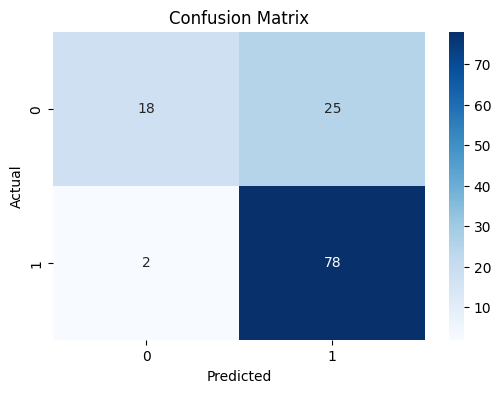

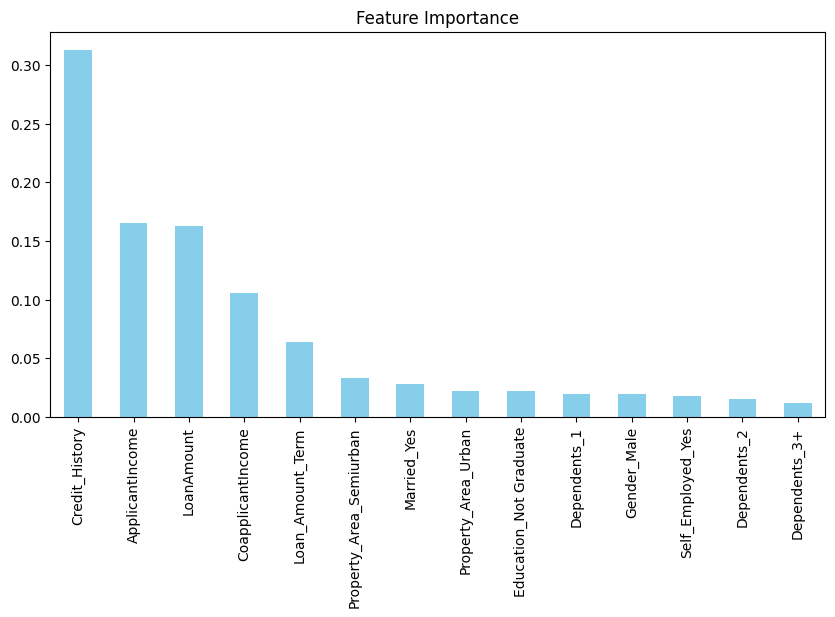

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load dataset
df = pd.read_csv("/content/trainset.csv")

# Drop irrelevant columns
if 'Loan_ID' in df.columns:
    df.drop(columns=['Loan_ID'], inplace=True)

# Separate numerical and categorical columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

cat_cols = df.select_dtypes(include=['object']).columns
if 'Loan_Status' in cat_cols:
    cat_cols = cat_cols.drop('Loan_Status')  # Ensure Loan_Status is not encoded

df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

# Encode categorical variables
encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
df_encoded = pd.DataFrame(encoder.fit_transform(df[cat_cols]))
df_encoded.columns = encoder.get_feature_names_out(cat_cols)
df = df.drop(columns=cat_cols).join(df_encoded)

# Ensure 'Loan_Status' is in the DataFrame before proceeding
if 'Loan_Status' in df.columns:
    print("Loan_Status column is present.")
    X = df.drop(columns=['Loan_Status'])
    y = df['Loan_Status'].map({'N': 0, 'Y': 1})  # Convert labels to 0/1
else:
    print("Loan_Status column not found in the DataFrame. Please check data preprocessing.")
    exit()

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Feature Importance
plt.figure(figsize=(10,5))
feature_importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
feature_importance.plot(kind='bar', color='skyblue')
plt.title("Feature Importance")
plt.show()